# Unsupervised Learning (UL) part

## C. 1. Iris clustering with K-means (4.5 points)

1. *(0.5 points) <span style="color:red"> Study how the K-means algorithm works and describe it in 3-5 short sentences in your own words in your report.* </span>

The K-Means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping clusters where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as "far" as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

2. *(0.5 point) <span style="color:red"> Run k-means as provided by the scikit-learn library on the iris dataset used in the lecture before. Implement your solution in kmeans_iris.py. Plot the data columns pairwise as scatter plots, colored by the different clusters determined by k-Means.* </span>

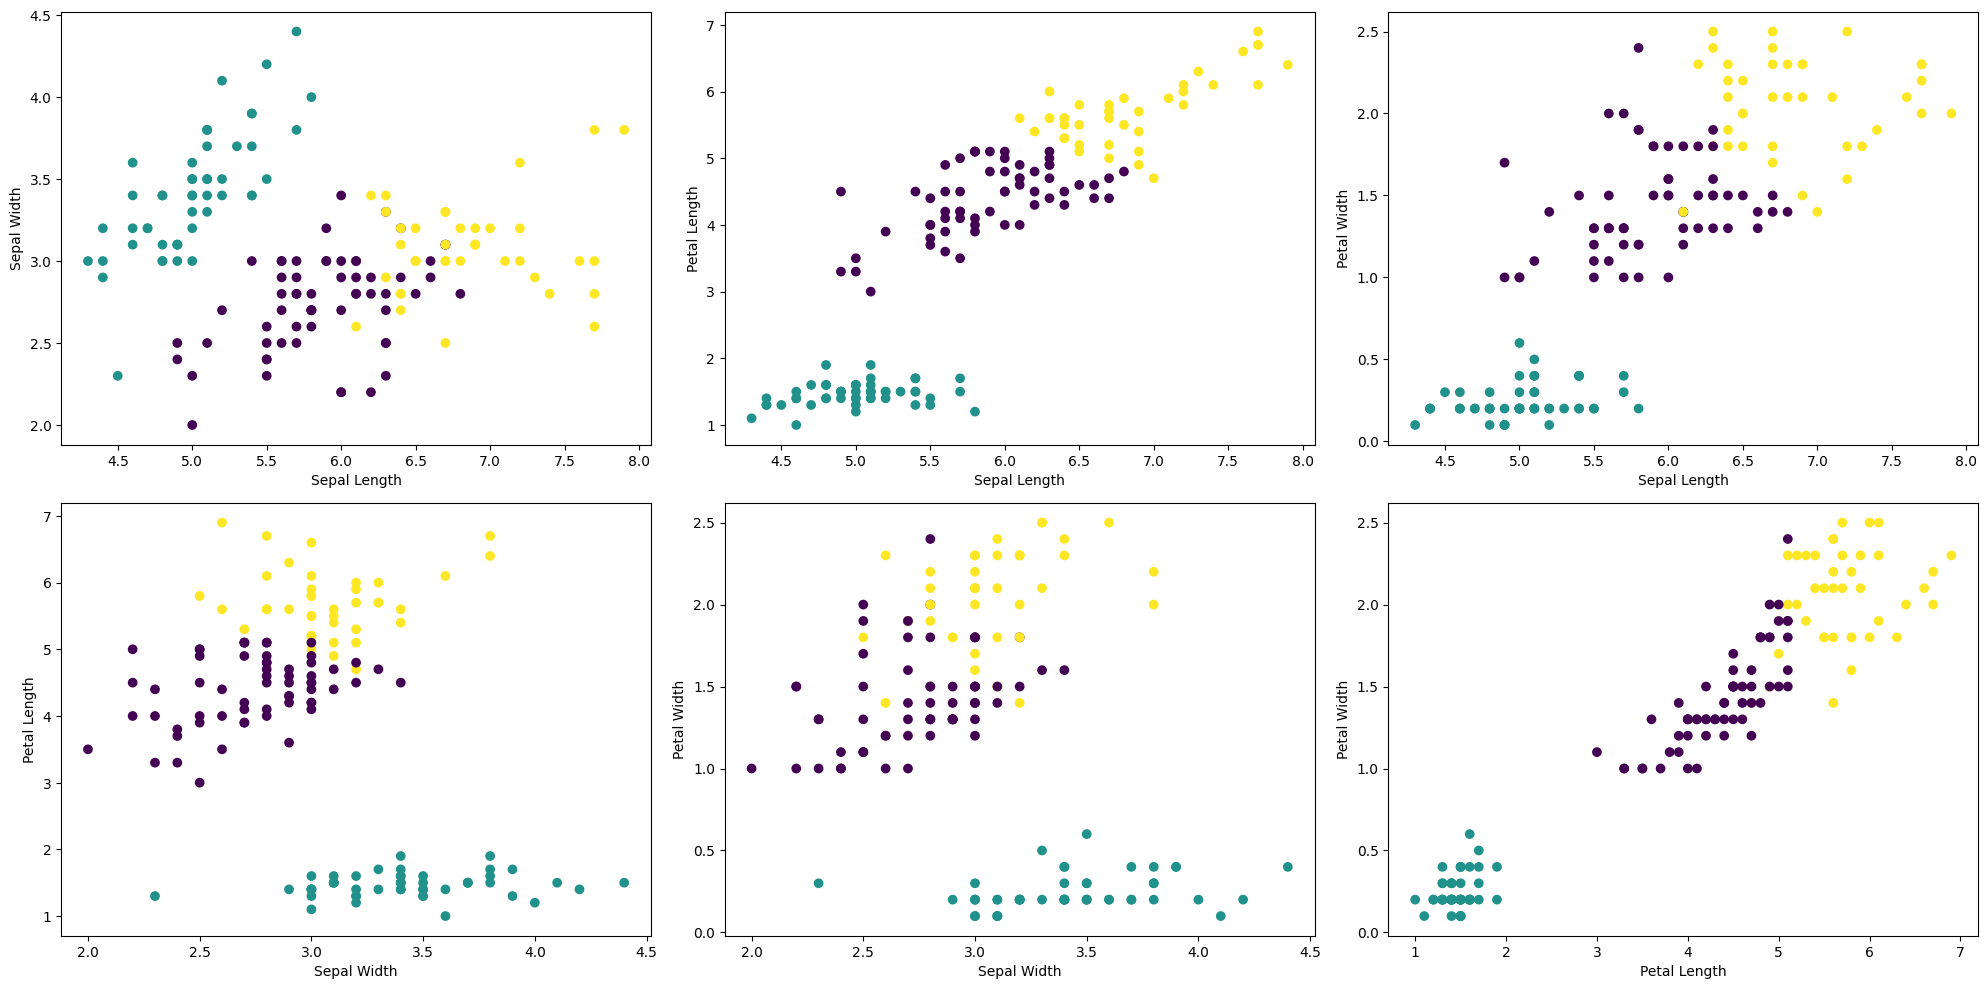

In [118]:
# Running kmeans provided by sklearn on the iris dataset and plotting the results 
# with data columns being ploted pairwise as scatter plots, colored by the different clusters determined by kmeans.

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import csv 

# Loading the iris dataset
iris = open("iris.csv")
iris = csv.reader(iris)
iris = np.array(list(iris))

# Get the data.
X = iris[1:, 0:4]
# Get the labels.
y = iris[1:, 4]

# Convert the data to float.
X = X.astype(float)

# Creating a kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=2)

# Fitting the model to the data
kmeans.fit(X)

# Getting the labels
labels = kmeans.predict(X)

# Creating a dataframe with the predicted clusters
df_labels = pd.DataFrame(labels)

# Renaming the column
df_labels.columns = ['labels']

# Creating a dataframe with the data
df_data = pd.DataFrame(X)

# Renaming the columns
df_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Concatenating the dataframes
df = pd.concat([df_data, df_labels], axis=1)

# Plotting the data
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.scatter(df.sepal_length, df.sepal_width, c=df.labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.subplot(2, 3, 2)
plt.scatter(df.sepal_length, df.petal_length, c=df.labels)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.subplot(2, 3, 3)
plt.scatter(df.sepal_length, df.petal_width, c=df.labels)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 3, 4)
plt.scatter(df.sepal_width, df.petal_length, c=df.labels)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.subplot(2, 3, 5)
plt.scatter(df.sepal_width, df.petal_width, c=df.labels)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.subplot(2, 3, 6)
plt.scatter(df.petal_length, df.petal_width, c=df.labels)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()

# Showing the plot
plt.show()



3. *(1.0 point) <span style="color:red"> Using the data labels, compute and report the accuracy and the confusion matrix for
the produced clusters. Motivate based on these results whether the trained model is suitable for
this problem.* </span>

In [119]:
# Getting the accuracy of the model

def get_accuracy(y_pred, y_true):
    # Convert string labels to numerical labels
    label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
    y_true = [label_map[label.lower()] for label in y_true]
    
    # Get the number of correct predictions
    n_correct = 0
    # For each prediction
    for i in range(len(y_pred)):
        # If the prediction is correct
        if y_pred[i] == y_true[i]:
            # Increment the number of correct predictions
            n_correct += 1
    # Return the accuracy
    return n_correct / len(y_pred)

# Get the predictions
y_pred = kmeans.predict(X)

# Get the accuracy
accuracy = get_accuracy(y_pred, y)

# Print the accuracy
print("Accuracy: {:.2f}".format(accuracy))

# Getting the confusion matrix of the model

def get_confusion_matrix(y_pred, y_true):
    # Convert string labels to numerical labels
    label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
    y_true = [label_map[label.lower()] for label in y_true]
    
    # Create the confusion matrix
    confusion_matrix = np.zeros((3, 3))
    # For each prediction
    for i in range(len(y_pred)):
        # Increment the confusion matrix
        confusion_matrix[y_pred[i], y_true[i]] += 1
    # Return the confusion matrix
    return confusion_matrix

# Get the confusion matrix
confusion_matrix = get_confusion_matrix(y_pred, y)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix)

Accuracy: 0.24
Confusion matrix:
[[ 0. 47. 14.]
 [50.  0.  0.]
 [ 0.  3. 36.]]


We see that the model is not suitable because the accuracy is nearly at 0.5, however we need a result near 1 to say that it is suitable. The confusion matrix shows that the model is not able to predict the right cluster for the data points.

4. *(0.5 point) <span style="color:red"> Compute the average silhouette score for each cluster and describe what this metric means.*

In [120]:
# Computing the average silhouette score for each cluster of the model

from sklearn.metrics import silhouette_score

# Compute the average silhouette score
silhouette_avg = silhouette_score(X, labels)

# Print the average silhouette score
print("Average silhouette score: {:.3f}".format(silhouette_avg))

Average silhouette score: 0.551


We have a silhouette score of 0.55 which means that the clusters are not well separated : the silouette score is there as a measure of how close each point in one cluster is to points in the neighboring clusters. This is the metric means.

5. *(1.0 point) <span style="color:red"> unknown species.csv contains 6 iris flowers whose species are unknown yet. Use your trained k-means model to predict which cluster these new flowers belong to. In the report provide a list that assigns the iris species determined by K-means to each id of the unknown flowers. Also, compute (in code) and report the silhouette score for each individual flower and explain the meaning of the silhouette score.* </span>

In [121]:
# Using the model to predict which cluster the new flowers introduced by unknown_species.csv belong to.

# Loading the unknown species dataset.
unknown_species = open("unknown_species.csv")
unknown_species = csv.reader(unknown_species)
unknown_species = np.array(list(unknown_species))

# Getting the data.
X_unknown = unknown_species[1:, 0:4]
# Getting the labels.
y_unknown = unknown_species[1:, 4]

# Converting the data to float.
X_unknown = X_unknown.astype(float)

# Predicting the clusters.
y_unknown_pred = kmeans.predict(X_unknown)

# Getting the avereage silhouette score for the unknown species dataset.
silhouette_scores_unknown = silhouette_score(X_unknown, y_unknown_pred)

# Print the silhouette scores
print("Average silhouette score for the unknown species dataset: {:.2f}".format(silhouette_scores_unknown))

Average silhouette score for the unknown species dataset: 0.44


We have a silhouette score equal to 0.44, which means that the clusters from the unknown species are even more seperated than the clusters from the iris dataset.

6. *(1.0 point) <span style="color:red"> Implement (naive) k-means from scratch in the file my kmeans.py and evaluate your implementation on the iris dataset. Evaluate how your implementation performs compared to the one provided by scikit-learn.* </span>

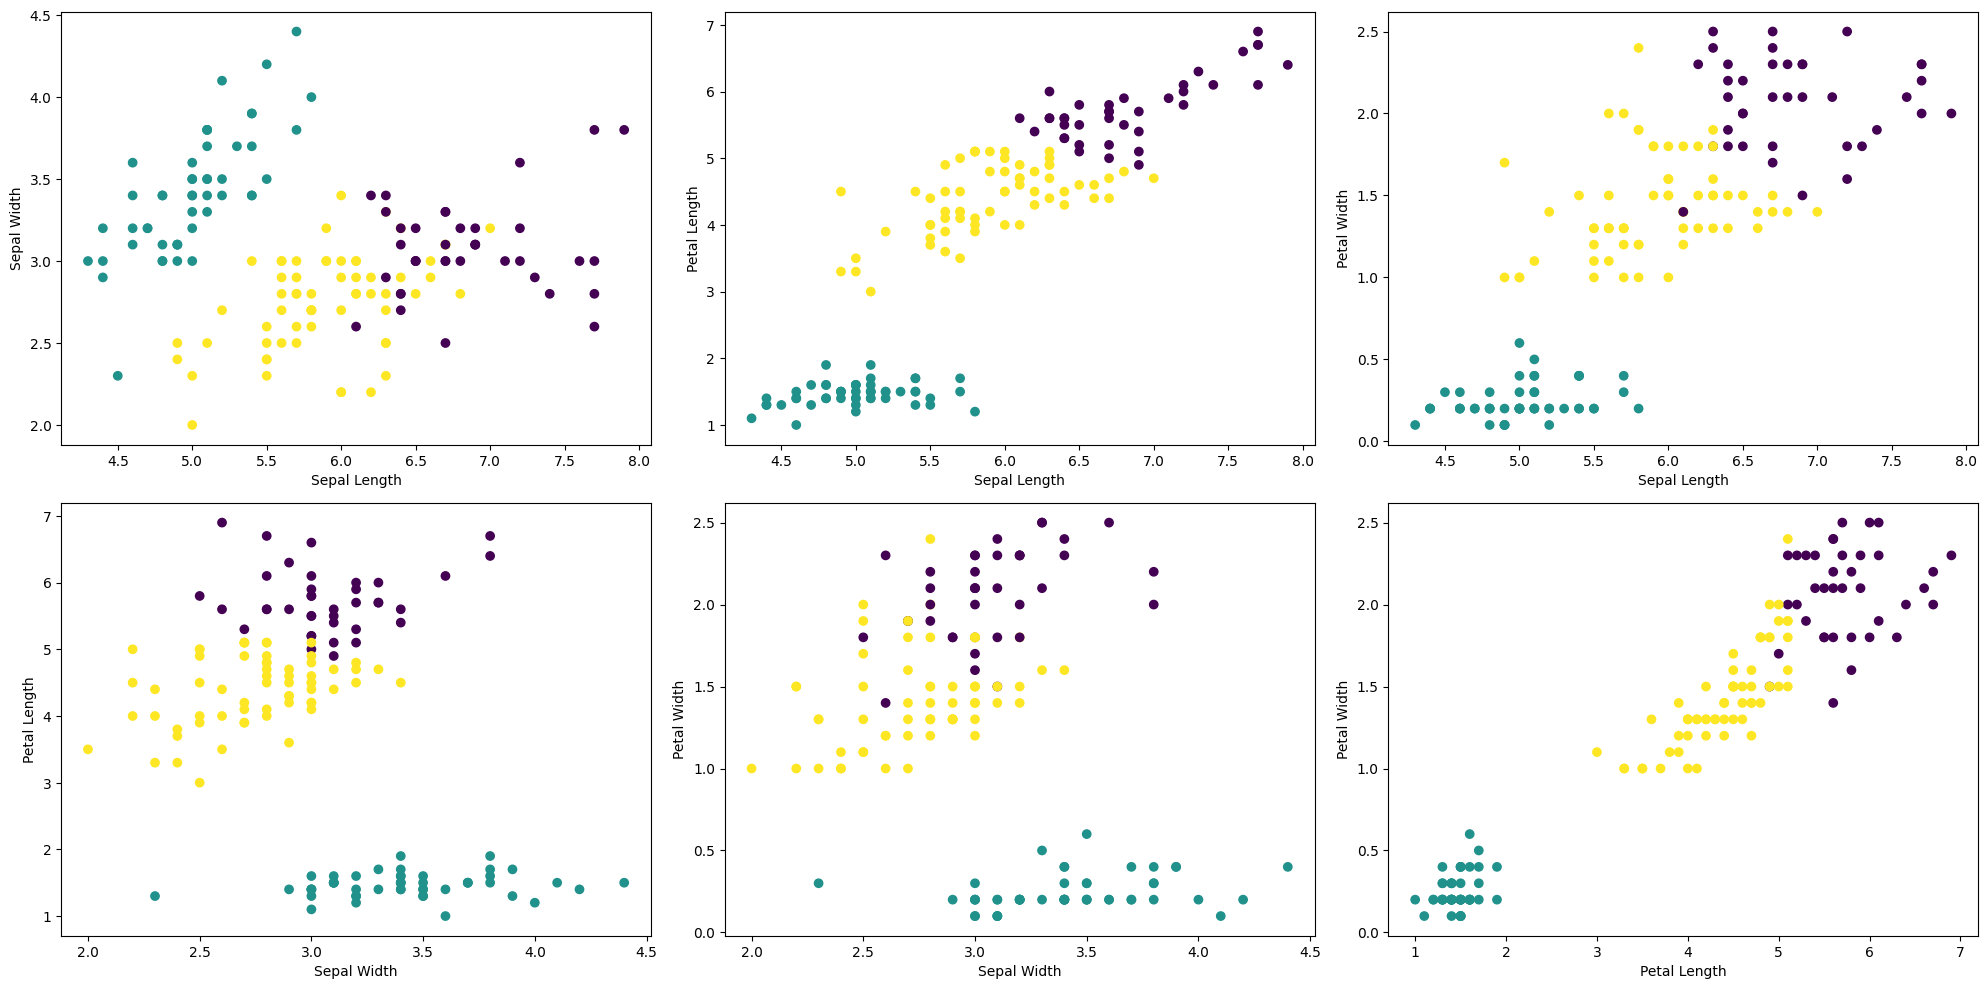

Accuracy: 0.09
Confusion matrix:
[[ 0.  2. 36.]
 [50.  0.  0.]
 [ 0. 48. 14.]]


In [122]:
# Implementation of the (naïve) k-means algorithm from scratch.

import numpy as np
import csv

def kmeansModel(X, k, max_iter=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(max_iter):
        # Assign each point to the closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids to be the mean of the points assigned to them
        for j in range(k):
            centroids[j] = X[labels == j].mean(axis=0)
    
    return labels, centroids

# Load the iris dataset.
iris = open("iris.csv")
iris = csv.reader(iris)
iris = np.array(list(iris))

# Get the data.
X = iris[1:, 0:4]
# Get the labels.
y = iris[1:, 4]

# Convert the data to float.
X = X.astype(float)

# Get the predictions.
y_pred, centroids = kmeansModel(X, 3)

# Plotting the data
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.subplot(2, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 3, 4)
plt.scatter(X[:, 1], X[:, 2], c=y_pred)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.subplot(2, 3, 5)
plt.scatter(X[:, 1], X[:, 3], c=y_pred)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.subplot(2, 3, 6)
plt.scatter(X[:, 2], X[:, 3], c=y_pred)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.show()

# Get the accuracy.
accuracy = get_accuracy(y_pred, y)

# Print the accuracy.
print("Accuracy: {:.2f}".format(accuracy))

# Get the confusion matrix.
confusion_matrix = get_confusion_matrix(y_pred, y)

# Print the confusion matrix.
print("Confusion matrix:")
print(confusion_matrix)


## C. 2. Clustering of three-dimensional shape dataset using DBScan (3.5 points)

1. *(0.5 points) <span style="color:red"> Study the DBScan algorithm and describe how it works in 3-5 sentences.* </span>

DBScan is a density-based clustering algorithm. It is based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density. The DBSCAN algorithm uses two parameters: epsilon and the minimum number of points required to form a dense region (minPts). It starts with an arbitrary starting point that has not been visited. This point's epsilon-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized epsilon-environment of a different point and hence be made part of a cluster.

2. *(0.5 points) <span style="color:red"> Download the ulu.csv dataset from Moodle and run the DBScan algorithm from the scikit-learn library on it. How many clusters does it generate with default parameters? Put your code into ulu dbscan.py.* </span>

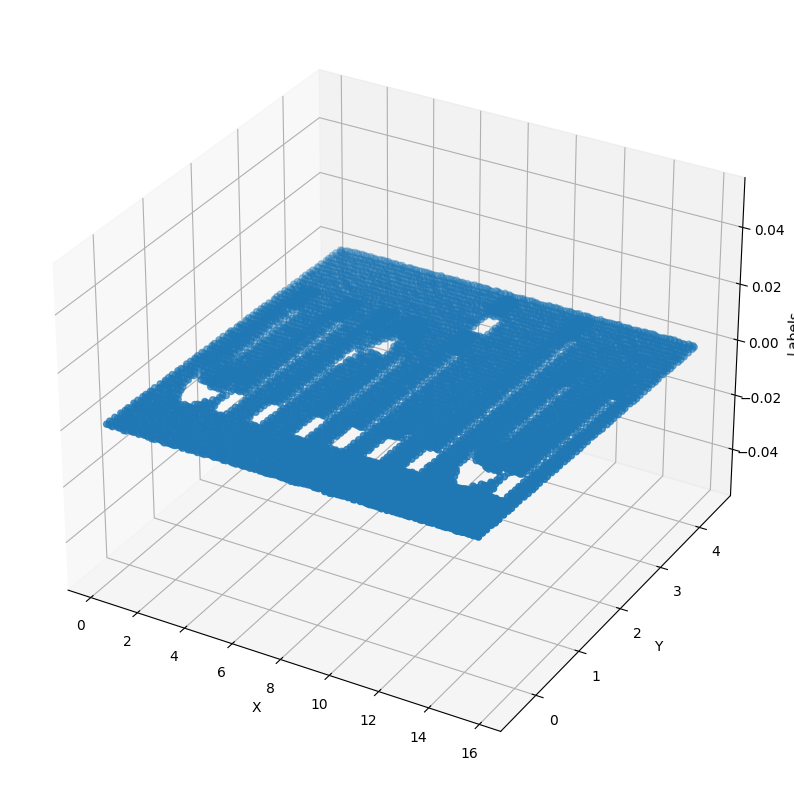

ValueError: Found input variables with inconsistent numbers of samples: [8778, 150]

In [123]:
# Running the DBscan algorithm provided by sklearn on the ulu.csv file and plotting the results with default parameters for the clusters.

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
import csv

# Loading the ulu dataset
ulu = open("ulu.csv")
ulu = csv.reader(ulu)
ulu = np.array(list(ulu))

# Get the data.
X = ulu[1:, 0:2]
# Get the labels.
y = ulu[1:, 2]

# Convert the data to float.
X = X.astype(float)

# Creating a DBSCAN model with default parameters
dbscan = DBSCAN()

# Fitting the model to the data
dbscan.fit(X)
prediction = dbscan.fit_predict(X)

# Creating a dataframe with the predicted clusters
df_labels = pd.DataFrame(prediction)

# Renaming the column
df_labels.columns = ['labels']

# Creating a dataframe with the data
df_data = pd.DataFrame(X)

# Renaming the columns
df_data.columns = ['x', 'y']

# Concatenating the dataframes
df = pd.concat([df_data, df_labels], axis=1)

# Plotting the data in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y, df.labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Labels')
plt.show()

# Computing the average silhouette score of the results of this model (for 5.)
silhouette_avg_dbscan = silhouette_score(X, labels)

We have 3 clusters that are generated with default parameters.

3. *(0.5 points) <span style="color:red"> Plot scatter plots per pair of features of the produced clusters using different colors. What shapes can you recognize ?* </span>

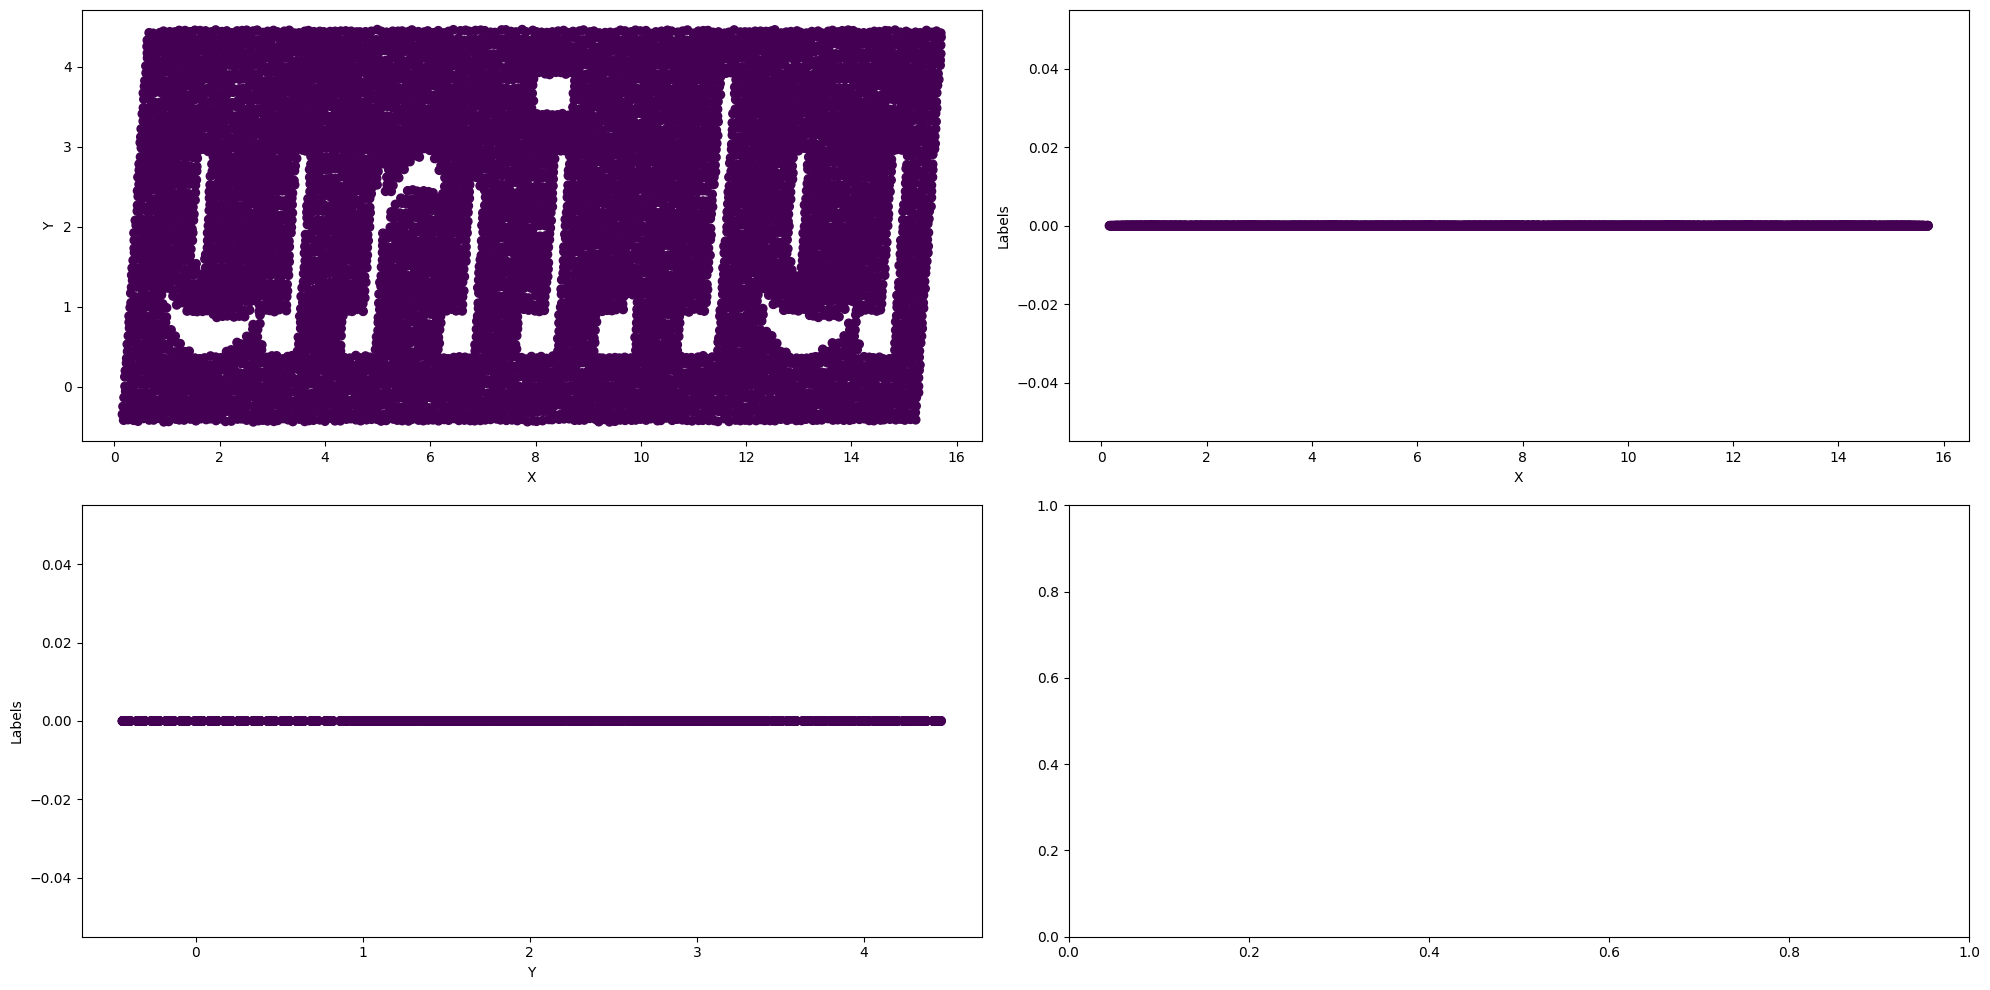

In [ ]:
# Plotting scatter plots per pair of features of the produced clusters using different colors.

# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Plotting the scatter plots
axs[0, 0].scatter(df.x, df.y, c=df.labels)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

axs[0, 1].scatter(df.x, df.labels, c=df.labels)
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Labels')

axs[1, 0].scatter(df.y, df.labels, c=df.labels)
axs[1, 0].set_xlabel('Y')
axs[1, 0].set_ylabel('Labels')

plt.tight_layout()
plt.show()

4. *(0.5 points) <span style="color:red"> Run k-means on the dataset and explain why the clusters do not make sense using this algorithm.* </span>

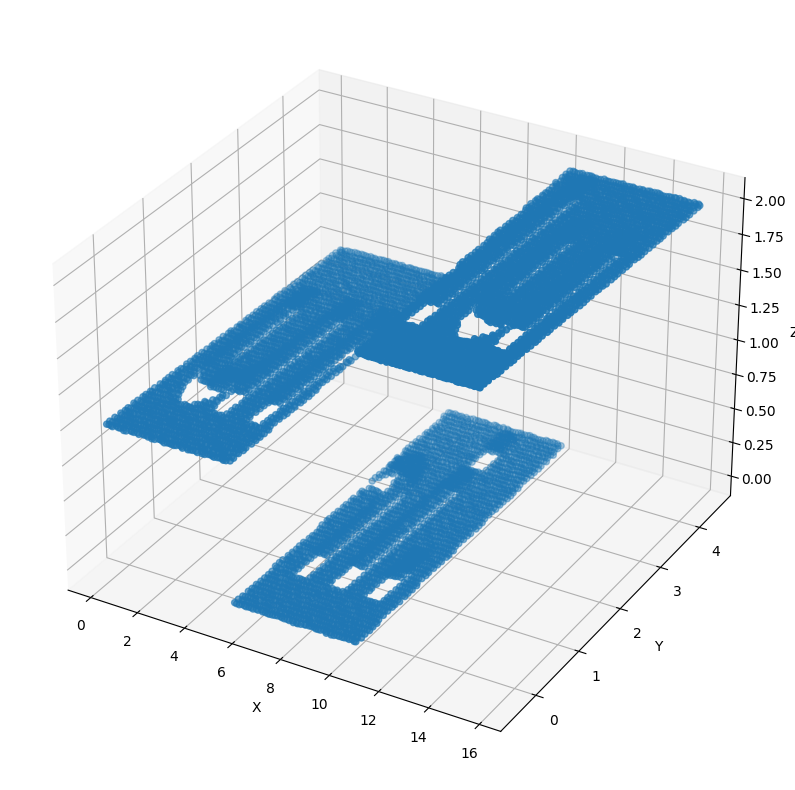

In [ ]:
# Running the k-means algorithm provided by sklearn on the ulu.csv file

from sklearn.cluster import KMeans

# Creating a kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=2)

# Fitting the model to the data
kmeans.fit(X)

# Getting the labels
labels = kmeans.predict(X)

# Creating a dataframe with the predicted clusters
df_labels = pd.DataFrame(labels)

# Renaming the column
df_labels.columns = ['labels']

# Creating a dataframe with the data
df_data = pd.DataFrame(X)

# Renaming the columns
df_data.columns = ['x', 'y']

# Concatenating the dataframes
df = pd.concat([df_data, df_labels], axis=1)

# Plotting the data in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y, df.labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Those clusters doesn't make sense using the k-means algorithm since the clusters aren't forming the initial uni.lu logo shape as the DBSCAN algorithm did.

5. *(0.5 points) <span style="color:red"> Compute the silhouette score for the results of DBScan and K-means. Why is the silhouette score worse for DBScan even though the clusters make more sense?* </span>

In [ ]:
# Computing the silhouette score for the results of DBSCAN and k-means
from sklearn.metrics import silhouette_score

# Compute the average silhouette score for k-means
silhouette_avg_kmeans = silhouette_score(X, labels)

# Printing the silhouette scores
print("Silhouette score for DBSCAN: {:.3f}".format(silhouette_avg_dbscan))
print("Silhouette score for k-means: {:.3f}".format(silhouette_avg_kmeans))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

6. *(0.5 points) <span style="color:red"> Run a PCA dimensionality reduction on the dataset and plot the results colored by cluster as determined by DBScan.* </span>

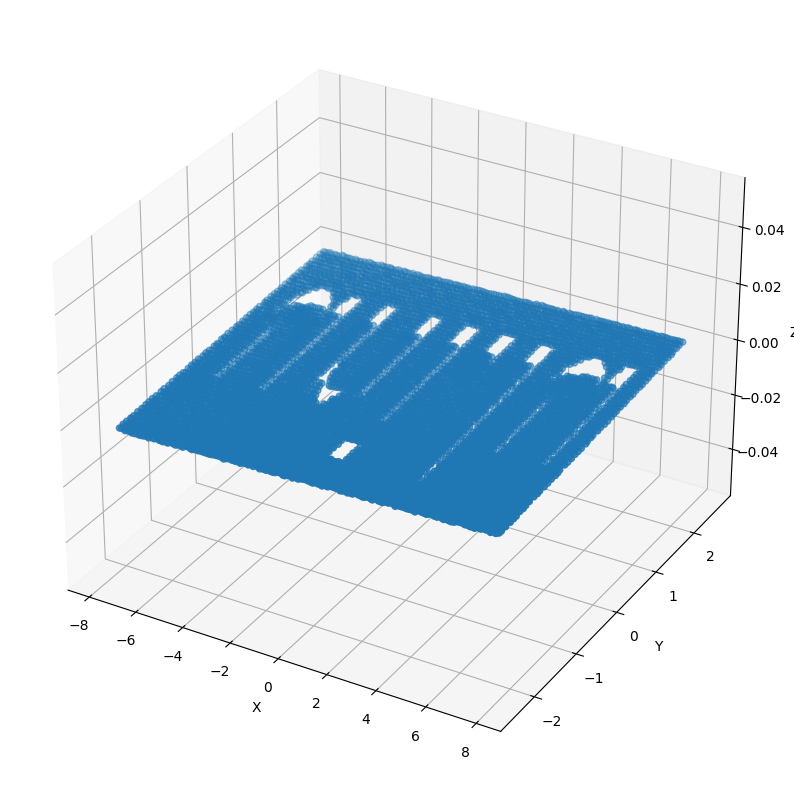

In [ ]:
# Running a PCA dimensionality reduction on the ulu dataset and plotting the results colored by cluster as determined by DBSCAN.
from sklearn.decomposition import PCA

# Creating a PCA model with 2 components
pca = PCA(n_components=2)

# Fitting the model to the data
pca.fit(X)

# Transforming the data
X_pca = pca.transform(X)

# Creating a dataframe with the data
df_data = pd.DataFrame(X_pca)

# Renaming the columns
df_data.columns = ['x', 'y']

# Concatenating the dataframes
df = pd.concat([df_data, df_labels], axis=1)

# Plotting the data in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y, df.labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

7. *(0.5 points) <span style="color:red"> What transformation does the PCA results reflect compared to the original dataset. (Hint: plot the dataset in 3D)* </span>

The PCA results compared to the original ulu dataset are that the clusters "reversed" in a way that the uni.lu logo shape is now the mirror opposite of the original one.